<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


1. Importamos el dataset desde el link con pd.read

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")
df.head()

Unnamed: 0                 time     open     high      low    close  \
0           0  2022-07-25 13:00:00  1.02427  1.02430  1.02145  1.02345   
1           1  2022-07-25 14:00:00  1.02345  1.02578  1.02288  1.02299   
2           2  2022-07-25 15:00:00  1.02303  1.02476  1.02230  1.02457   
3           3  2022-07-25 16:00:00  1.02454  1.02548  1.02355  1.02485   
4           4  2022-07-25 17:00:00  1.02485  1.02514  1.02030  1.02181   

   tick_volume  spread  real_volume  MeanCloseOpen  Diff_Close  Diff_Open  \
0         3927       8            0       1.023860    -0.00046   -0.00082   
1         5344       8            0       1.023220    -0.00046   -0.00082   
2         5524       8            0       1.023800     0.00158   -0.00042   
3         5234       8            0       1.024695     0.00028    0.00151   
4         9031       7            0       1.023330    -0.00304    0.00031   

   Diff_MeanCloseOpen  
0           -0.000640  
1           -0.000640  
2            0.000580  
3            0.000895  
4           -0.001365

2. Definimos Como indice la columna tiempo

In [ ]:
df.index = pd.to_datetime(df['time'])
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


4. Verificamos si hay algun dato null en nuestro dataset

In [ ]:
df.isnull().sum()

Unnamed: 0            0
time                  0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

Hacemos drop a las columnas que no nos interesan, puesto que para este laboratorio solo trabajaremos con el precio de cierre de cada dia

In [ ]:
df.rename(columns = {'close':'Close'}, inplace = True)
df = df.drop(columns = ['open',	'Unnamed: 0', 'time', 'high',	'low', 'tick_volume',	'spread',	'real_volume',	'MeanCloseOpen',	'Diff_Close',	'Diff_Open',	'Diff_MeanCloseOpen'])

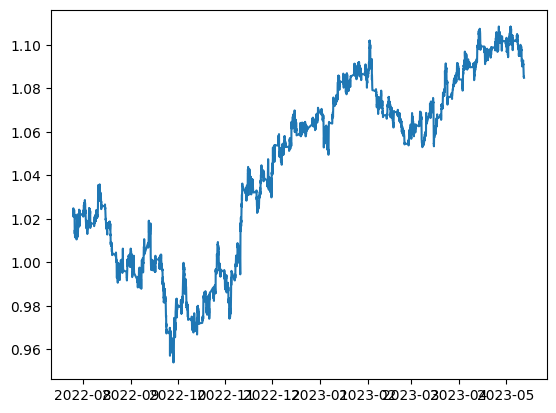

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])

Construimos una nueva columna, para almacenar la diferencia de precios entre el conrespecto al dia anterior

In [ ]:
df['DiffPrice'] = df['Close'].diff()
df

Close  DiffPrice
time                                   
2022-07-25 13:00:00  1.02345        NaN
2022-07-25 14:00:00  1.02299   -0.00046
2022-07-25 15:00:00  1.02457    0.00158
2022-07-25 16:00:00  1.02485    0.00028
2022-07-25 17:00:00  1.02181   -0.00304
...                      ...        ...
2023-05-12 19:00:00  1.08514   -0.00038
2023-05-12 20:00:00  1.08546    0.00032
2023-05-12 21:00:00  1.08531   -0.00015
2023-05-12 22:00:00  1.08518   -0.00013
2023-05-12 23:00:00  1.08494   -0.00024

[5000 rows x 2 columns]

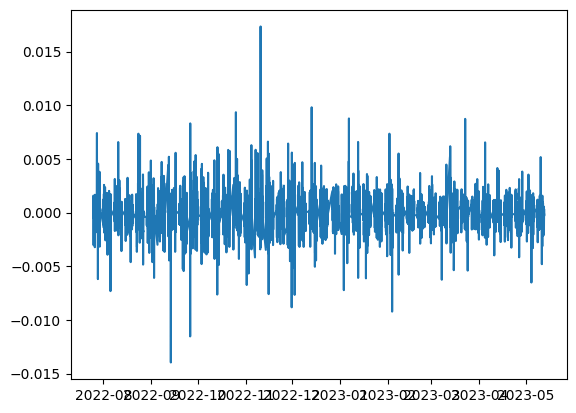

In [ ]:
plt.plot(df['DiffPrice'])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   3.,   2.,
          0.,   2.,   2.,   3.,   2.,   4.,   3.,   8.,   5.,   7.,  21.,
         11.,  26.,  31.,  31.,  59.,  98., 130., 195., 307., 433., 654.,
        756., 635., 485., 362., 207., 155.,  96.,  72.,  52.,  31.,  22.,
         17.,  10.,   9.,   5.,   8.,   5.,   5.,   6.,   2.,   3.,   5.,
          0.,   1.,   3.,   0.,   0.,   1.,   2.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.01397  , -0.0136569, -0.0133438, -0.0130307, -0.0127176,
        -0.0124045, -0.0120914, -0.0117783, -0.0114652, -0.0111521,
        -0.010839 , -0.0105259, -0.0102128, -0.0098997, -0.0095866,
        -0.0092735, -0.0089604, -0.0086473, -0.0083342, -0.0080211,
        -0.007708 , -0.0073949, -0.0070818, -0

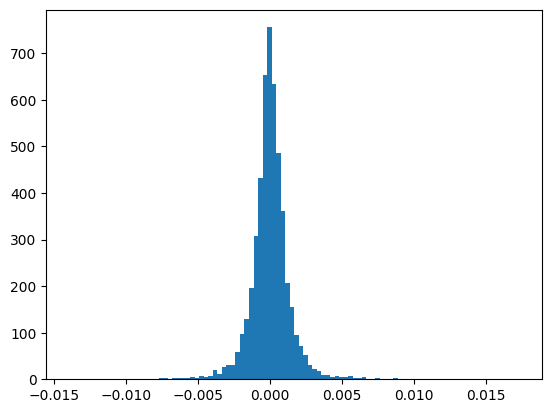

In [ ]:
plt.hist(df['DiffPrice'], bins = 100)

Importamos la libreria de Fitter, la cual usaremos para reconocer la mejor distribucion que se ajusta a nuestros datos.

In [ ]:
!pip install fitter

(14613.527947910232,
 27360.991772190286,
 -0.20964563672636735,
 0.6022017125608812)

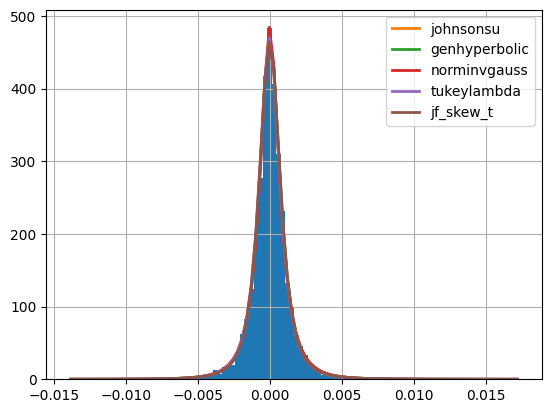

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

df.dropna(inplace=True)

f = Fitter(df['DiffPrice'],
           distributions=get_distributions())
f.fit()
f.summary()

# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

Notemos que la distribucion que mas se acerca es la de johnsonsu, que es de la forma:

$$
z = γ + δ sinh^{-1} \Biggl( \frac{x - ξ}{ξ - λ - x} \Biggl)
$$

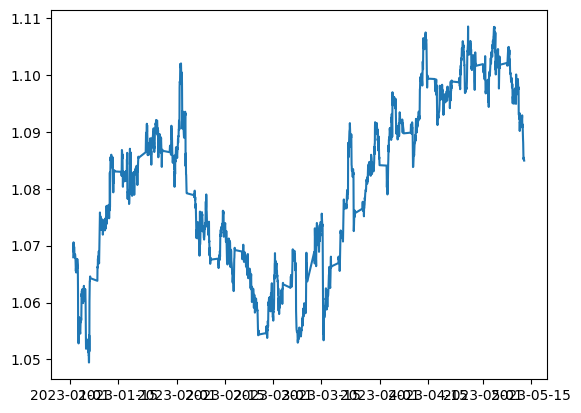

In [ ]:
df_2023 = df.index.year == 2023
df_2023 = df[df_2023]

plt.plot(df_2023['Close'])

In [ ]:
p15 = df['Close'].groupby(pd.Grouper(freq='15D')).mean()

print(p15)

time
2022-07-25    1.019586
2022-08-09    1.016159
2022-08-24    0.996934
2022-09-08    0.999753
2022-09-23    0.976675
2022-10-08    0.976156
2022-10-23    0.990803
2022-11-07    1.022115
2022-11-22    1.041364
2022-12-07    1.058546
2022-12-22    1.062721
2023-01-06    1.076848
2023-01-21    1.088847
2023-02-05    1.071505
2023-02-20    1.062398
2023-03-07    1.064765
2023-03-22    1.085108
2023-04-06    1.094910
2023-04-21    1.101343
2023-05-06    1.096285
Freq: 15D, Name: Close, dtype: float64


-----

## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



1. Importamos el dataset de la siguiente forma:

In [2]:
!pip install ucimlrepo

Notamos que hay diferentes datasets disponibles con list_available_datasets y nos concentramos en importar el que corresponde al id 17, que corresponde al breast cancer wisconsin (diagnostic)

In [45]:
from ucimlrepo import fetch_ucirepo, list_available_datasets


breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

dfc = breast_cancer_wisconsin_diagnostic.data.features

dfc.head() I

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   concave_points3  symmetry3  fractal_dimension3  
0           0.2654     0.4601             0.11890  
1           0.1860     0.2750             0.08902  
2           0.2430     0.3613             0.08758  
3           0.2575     0.6638             0.17300  
4           0.1625     0.2364             0.07678  

[5 rows x 30 columns]

2. Cambiamos el nombre de las columnas a PascalCase

In [46]:
dfc.rename(columns = lambda col: ''.join([i.capitalize() for i in col.split('_')]), inplace=True)
dfc.head()

<ipython-input-46-0dd96646a2ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.rename(columns = lambda col: ''.join([i.capitalize() for i in col.split('_')]), inplace=True)


Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Radius3  \
0      0.3001         0.14710     0.2419            0.07871  ...    25.38   
1      0.0869         0.07017     0.1812            0.05667  ...    24.99   
2      0.1974         0.12790     0.2069            0.05999  ...    23.57   
3      0.2414         0.10520     0.2597            0.09744  ...    14.91   
4      0.1980         0.10430     0.1809            0.05883  ...    22.54   

   Texture3  Perimeter3   Area3  Smoothness3  Compactness3  Concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   ConcavePoints3  Symmetry3  FractalDimension3  
0          0.2654     0.4601            0.11890  
1          0.1860     0.2750            0.08902  
2          0.2430     0.3613            0.08758  
3          0.2575     0.6638            0.17300  
4          0.1625     0.2364            0.07678  

[5 rows x 30 columns]

Con head() Podemos ver el las primeras filas del dataset, esto es particularmente util para una primera impresion de la informacion alli contanida, de manera analoga tail() nos mostrara las ultimas filas del mismo

In [47]:
dfc.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

Info nos muestra el tipo de datos y si hay datos null en alguna de las columnas

In [48]:
dfc.describe()

Radius1    Texture1  Perimeter1        Area1  Smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       Compactness1  Concavity1  ConcavePoints1   Symmetry1  \
count    569.000000  569.000000      569.000000  569.000000   
mean       0.104341    0.088799        0.048919    0.181162   
std        0.052813    0.079720        0.038803    0.027414   
min        0.019380    0.000000        0.000000    0.106000   
25%        0.064920    0.029560        0.020310    0.161900   
50%        0.092630    0.061540        0.033500    0.179200   
75%        0.130400    0.130700        0.074000    0.195700   
max        0.345400    0.426800        0.201200    0.304000   

       FractalDimension1  ...     Radius3    Texture3  Perimeter3  \
count         569.000000  ...  569.000000  569.000000  569.000000   
mean            0.062798  ...   16.269190   25.677223  107.261213   
std             0.007060  ...    4.833242    6.146258   33.602542   
min             0.049960  ...    7.930000   12.020000   50.410000   
25%             0.057700  ...   13.010000   21.080000   84.110000   
50%             0.061540  ...   14.970000   25.410000   97.660000   
75%             0.066120  ...   18.790000   29.720000  125.400000   
max             0.097440  ...   36.040000   49.540000  251.200000   

             Area3  Smoothness3  Compactness3  Concavity3  ConcavePoints3  \
count   569.000000   569.000000    569.000000  569.000000      569.000000   
mean    880.583128     0.132369      0.254265    0.272188        0.114606   
std     569.356993     0.022832      0.157336    0.208624        0.065732   
min     185.200000     0.071170      0.027290    0.000000        0.000000   
25%     515.300000     0.116600      0.147200    0.114500        0.064930   
50%     686.500000     0.131300      0.211900    0.226700        0.099930   
75%    1084.000000     0.146000      0.339100    0.382900        0.161400   
max    4254.000000     0.222600      1.058000    1.252000        0.291000   

        Symmetry3  FractalDimension3  
count  569.000000         569.000000  
mean     0.290076           0.083946  
std      0.061867           0.018061  
min      0.156500           0.055040  
25%      0.250400           0.071460  
50%      0.282200           0.080040  
75%      0.317900           0.092080  
max      0.663800           0.207500  

[8 rows x 30 columns]

Mientras que describe nos muestra el promedio, nos cuenta la cantidad de datos, el minimo, la desviacion estandar y algunos datos mas.

4. Notemos que en nuestro dataframe no se encuentra ningun dato null, sin embargo, una estrategia para manejar los datos podria ser eliminar la fila donde esta null o NaN esto afectara mas o menos dependiendo de la cantidad de datos de nuestro dataset.

In [49]:
dfc.isnull().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
dtype: int64

5. Agregamos la columna Targets a nuestro dataset, de la siguiente forma:

In [50]:
dfc['Targets'] = breast_cancer_wisconsin_diagnostic.data.targets

<ipython-input-50-6453423d3d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Targets'] = breast_cancer_wisconsin_diagnostic.data.targets


In [51]:
dfc['Targets'].unique()

array(['M', 'B'], dtype=object)

Por lo tanto, tenemos dos tipos de valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno)



6. contemos cuantos casos benignos y malignos existen en nuestro dataset

<Axes: xlabel='Targets', ylabel='count'>

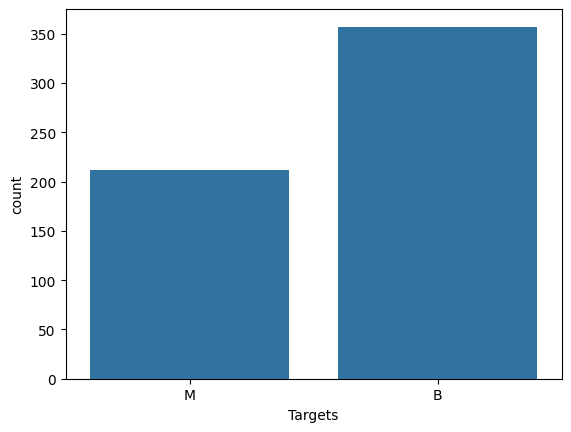

In [52]:
import seaborn as sns

sns.countplot(x='Targets', data=dfc)

7. Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M.

Esto lo hacemos de la siguiente forma:

In [53]:
dfc['DiagnosisNumeric'] = dfc['Targets'].map({'B': 0, 'M': 1})

8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:

```
(x - mean(x)) / std(x)
```



In [55]:
dfc.drop('Targets', axis='columns', inplace=True)

dfc_N = (dfc - dfc.mean()) / dfc.std()

dfc_N.head()

Radius1  Texture1  Perimeter1     Area1  Smoothness1  Compactness1  \
0  1.096100 -2.071512    1.268817  0.983510     1.567087      3.280628   
1  1.828212 -0.353322    1.684473  1.907030    -0.826235     -0.486643   
2  1.578499  0.455786    1.565126  1.557513     0.941382      1.052000   
3 -0.768233  0.253509   -0.592166 -0.763792     3.280667      3.399917   
4  1.748758 -1.150804    1.775011  1.824624     0.280125      0.538866   

   Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Texture3  \
0    2.650542        2.530249   2.215566           2.253764  ... -1.358098   
1   -0.023825        0.547662   0.001391          -0.867889  ... -0.368879   
2    1.362280        2.035440   0.938859          -0.397658  ... -0.023953   
3    1.914213        1.450431   2.864862           4.906602  ...  0.133866   
4    1.369806        1.427237  -0.009552          -0.561956  ... -1.465481   

   Perimeter3     Area3  Smoothness3  Compactness3  Concavity3  \
0    2.301575  1.999478     1.306537      2.614365    2.107672   
1    1.533776  1.888827    -0.375282     -0.430066   -0.146620   
2    1.346291  1.455004     0.526944      1.081980    0.854222   
3   -0.249720 -0.549538     3.391291      3.889975    1.987839   
4    1.337363  1.219651     0.220362     -0.313119    0.612640   

   ConcavePoints3  Symmetry3  FractalDimension3  DiagnosisNumeric  
0        2.294058   2.748204           1.935312          1.296535  
1        1.086129  -0.243675           0.280943          1.296535  
2        1.953282   1.151242           0.201214          1.296535  
3        2.173873   6.040726           4.930672          1.296535  
4        0.728618  -0.867590          -0.396751          1.296535  

[5 rows x 31 columns]

In [56]:
dfc_N.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'DiagnosisNumeric'],
      dtype='object')

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.



In [57]:
import pandas as pd

columns_to_group = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'ConcavePoints', 'Symmetry', 'FractalDimension']

averages = {}

for col in columns_to_group:
    col_group = [c for c in dfc_N.columns if c.startswith(col)]
    averages[f'{col}Mean'] = dfc_N[col_group].mean(axis=1)

averages_dfc = pd.DataFrame(averages)
averages_dfc['Diagnosis'] = breast_cancer_wisconsin_diagnostic.data.targets

averages_dfc

RadiusMean  TextureMean  PerimeterMean  AreaMean  SmoothnessMean  \
0      1.822892    -1.331460       2.133644  1.822793        0.886604   
1      1.377122    -0.532558       1.160448  1.512536       -0.602112   
2      1.438879    -0.115855       1.253866  1.397605        0.390527   
3     -0.241121     0.092354      -0.185181 -0.533818        2.453684   
4      1.438539    -1.135278       1.461481  1.411195        0.660750   
..          ...          ...            ...       ...             ...   
564    2.262762     0.303132       2.062496  2.319074        0.834796   
565    1.512694     2.129283       1.397014  1.502133       -0.337297   
566    0.482422     1.053425       0.509009  0.395171       -0.675876   
567    1.651053     1.751949       1.906541  1.464675        0.926916   
568   -1.095560     0.788997      -1.133860 -0.962405       -1.639145   

     CompactnessMean  ConcavityMean  ConcavePointsMean  SymmetryMean  \
0           2.403566       1.827201           1.828182      2.037172   
1          -0.536342      -0.203612           0.631241     -0.349009   
2           0.982746       0.809797           1.804099      0.775643   
3           3.343920       1.573617           1.579444      4.544703   
4           0.059090       0.936729           1.099685     -0.412639   
..               ...            ...                ...           ...   
564         0.045809       1.091639           2.004001     -0.936231   
565        -0.160662       0.393593           0.934487     -0.312618   
566         0.324159       0.294468           0.377003     -0.934205   
567         3.062208       2.596660           1.909844      1.459686   
568        -1.172908      -1.158382          -1.638668     -0.038426   

     FractalDimensionMean Diagnosis  
0                1.698454         M  
1               -0.228767         M  
2                0.032286         M  
3                3.960995         M  
4               -0.153272         M  
..                    ...       ...  
564             -0.490281         M  
565             -0.840309         M  
566             -0.392078         M  
567              1.387908         M  
568             -0.564501         B  

[569 rows x 11 columns]

10. Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

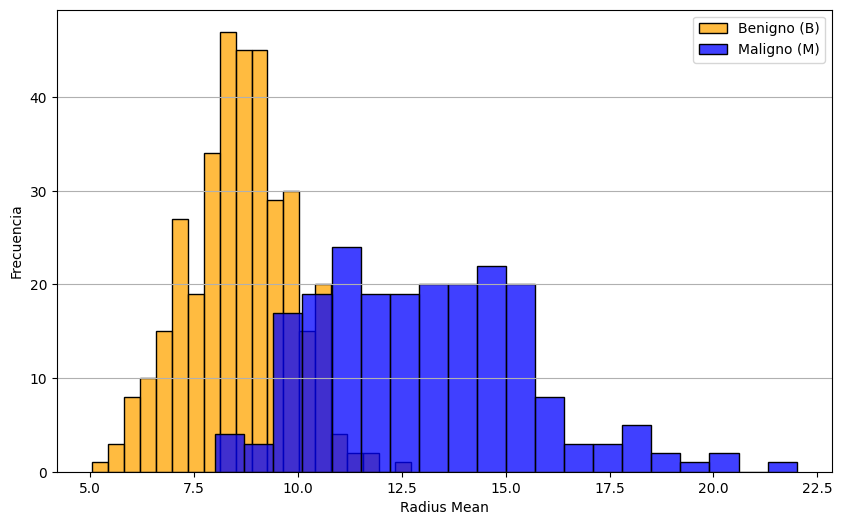

In [58]:
import matplotlib.pyplot as plt

RadiusCol = [col for col in dfc.columns if col.startswith('Radius')]
dfc['RadiusMean'] = dfc[RadiusCol].mean(axis=1)


plt.figure(figsize=(10, 6))
sns.histplot(dfc[dfc['DiagnosisNumeric'] == 0]['RadiusMean'], bins=20, color='orange', label='Benigno (B)')
sns.histplot(dfc[dfc['DiagnosisNumeric'] == 1]['RadiusMean'], bins=20, color='blue', label='Maligno (M)')

plt.xlabel('Radius Mean')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y')

plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

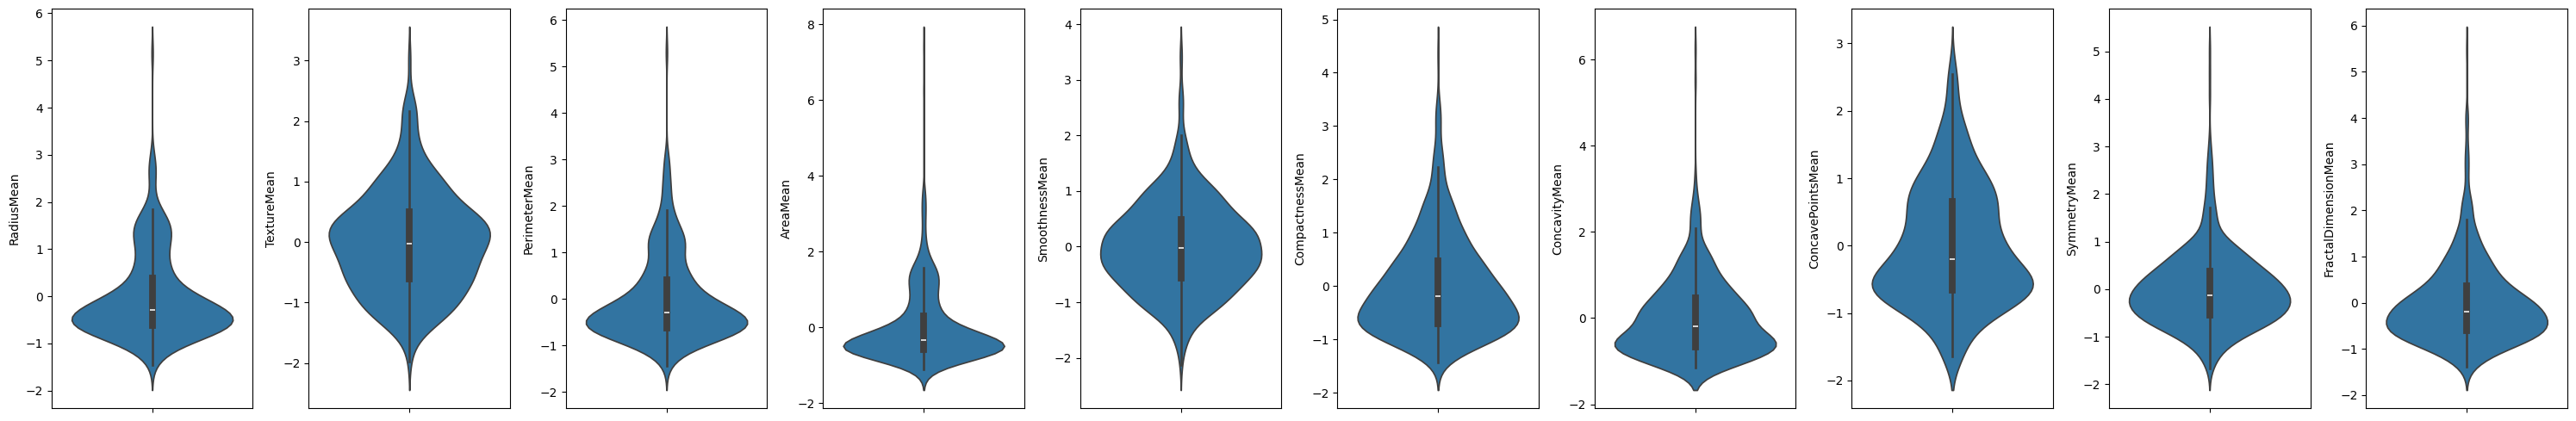

In [68]:
fig, axes = plt.subplots(1, 10 , figsize=(30, 5))

columns_to_plot = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean']

i = 0
for col in columns_to_plot:
    sns.violinplot(ax=axes[i],data=averages_dfc, y=col)
    i+=1

plt.tight_layout()

plt.show()

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

<ipython-input-82-c827f8ce6a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averages_dfc['DiagnosisNumeric'] = dfc_N['DiagnosisNumeric']


(525, 12)

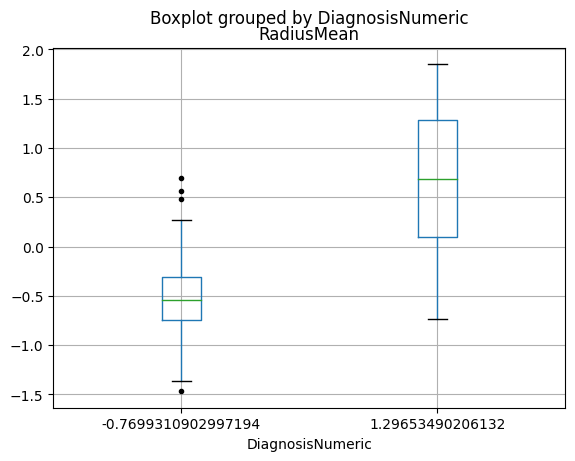

In [82]:
averages_dfc['DiagnosisNumeric'] = dfc_N['DiagnosisNumeric']
averages_dfc.boxplot(column="RadiusMean", by='DiagnosisNumeric', sym='k.')

Q1 = averages_dfc['RadiusMean'].quantile(0.25)
Q3 = averages_dfc['RadiusMean'].quantile(0.75)

IQR = Q3 - Q1
averagesIQR = averages_dfc[~((averages_dfc['RadiusMean'] < (Q1 - 1.5 * IQR)) | (averages_dfc['RadiusMean'] > (Q3 + 1.5 * IQR)))]
averagesIQR.shape

13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [85]:
##averages_dfc.drop('Diagnosis', axis='columns', inplace=True)
corr_matrix = averages_dfc.corr()
print(corr_matrix)

                      RadiusMean  TextureMean  PerimeterMean  AreaMean  \
RadiusMean              1.000000     0.253451       0.987938  0.989819   
TextureMean             0.253451     1.000000       0.266161  0.242076   
PerimeterMean           0.987938     0.266161       1.000000  0.978519   
AreaMean                0.989819     0.242076       0.978519  1.000000   
SmoothnessMean          0.087366     0.092883       0.107334  0.072624   
CompactnessMean         0.436381     0.224754       0.509408  0.414704   
ConcavityMean           0.500628     0.234276       0.552950  0.488053   
ConcavePointsMean       0.735911     0.222065       0.777879  0.712503   
SymmetryMean            0.186481     0.134877       0.224173  0.158451   
FractalDimensionMean   -0.031102     0.097017       0.025312 -0.050280   
DiagnosisNumeric        0.776936     0.330534       0.781431  0.769258   

                      SmoothnessMean  CompactnessMean  ConcavityMean  \
RadiusMean                  0.087366   

<Axes: >

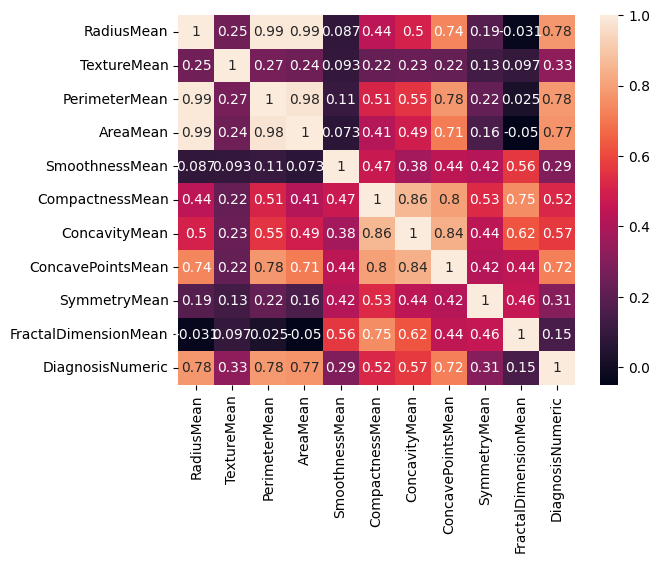

In [89]:
sns.heatmap(corr_matrix, annot=True)

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Existen muchos tipos de graficos que pueden ayudarnos a entender mejor la relacion entre los datos que estamos analizando, los de dispersion son un caso particular, que en nuestro estudio son utiles para mirar relaciones entre datos

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

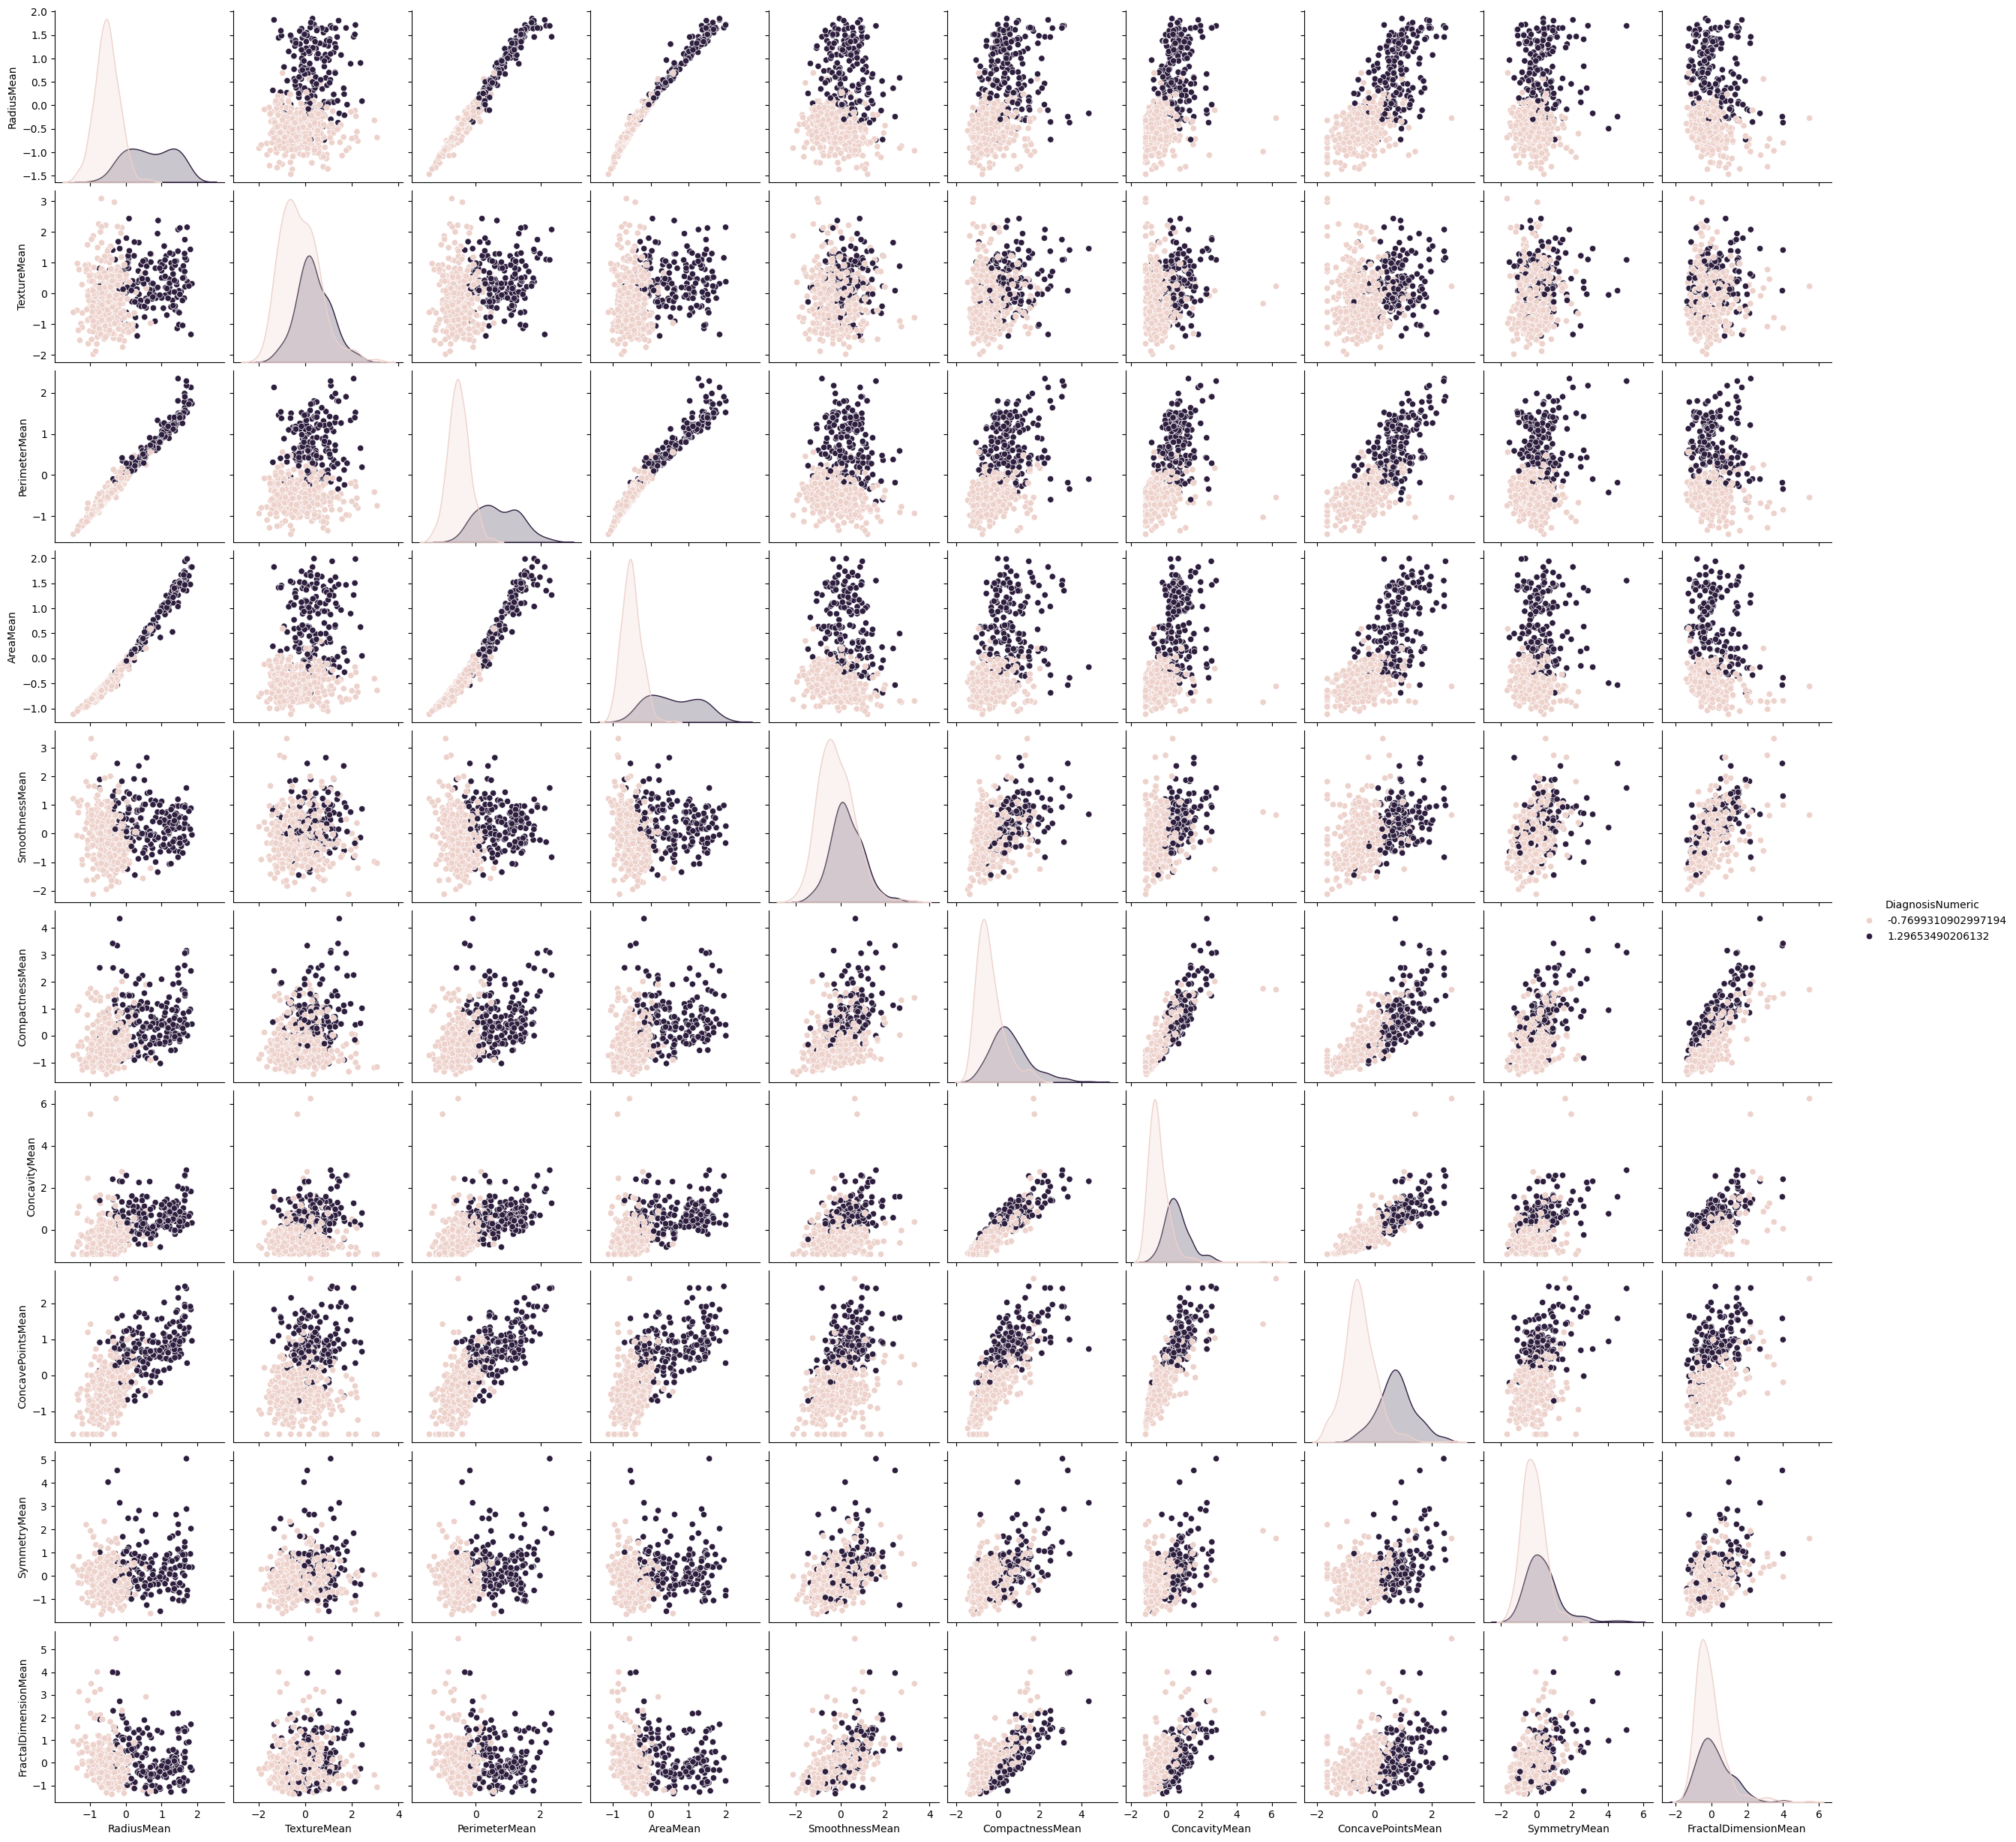

In [92]:
sns.pairplot(averages_dfc, hue='DiagnosisNumeric')